## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Regression 
%matplotlib inline


## Kaggle API Connection 

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

## Download Data from Kaggle 

In [3]:
api.dataset_download_file('budincsevity/szeged-weather','weatherHistory.csv')

False

## Unzip The Downloaded Dataset File 

In [4]:
from zipfile import ZipFile
zf = ZipFile('weatherHistory.csv.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

## Read Required Data From CSV File

In [5]:
dataset = np.array(pd.read_csv('weatherHistory.csv', usecols=['Apparent Temperature (C)', 'Humidity']))

## Getting Sample Data  

In [29]:
X = np.array(np.reshape(dataset[:250, 1], (250, 1)))
Y = np.array(np.reshape(dataset[:250, 0], (250, 1)))


numpy.ndarray

## Data Plot Before Regression  

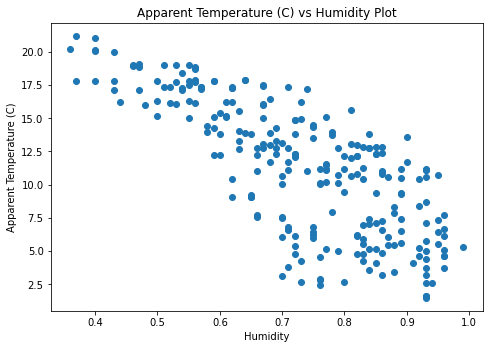

In [34]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('Humidity')
ax.set_ylabel('Apparent Temperature (C)')
ax.set_title('Apparent Temperature (C) vs Humidity Plot')
ax.scatter(X,Y)
plt.show()